## Sprint 13: Pronosticos y Predicciones <a id='back'></a>

## INTRODUCCION <a id='intro'></a>
Con el fin de combatir la cancelación de sus usuarios, la empresa Model Fitness ha digitalizado varios de sus perfiles de clientes. La tarea consiste en analizarl a los usuarios y elaborar una estrategia para la retención de clientes.

Con los análisis que se van a realizar, se busca:Predecir la probabilidad de pérdida de cada cliente para el próximo mes.

Se realizarán las siguientes actividades: Elaborar retratos de usuarios típicos seleccionando los grupos más destacados y describir sus características principales. Analizar los factores que más impactan la pérdida. Identificar a los grupos objetivo y sugerir medidas para reducir la rotación; así como describir cualquier otro patrón que se observe con respecto a la interacción con los clientes. Finalmente obtener conclusiones básicas y elaborar recomendaciones para mejorar la atención al cliente.

## ANÁLISIS EXPLORATORIO DE LOS DATOS <a id='eda'></a>
La compañía proporcionó el archivo CSV que contiene los datos sobre la cancelación de un mes en concreto e información del mes que lo precedía. El dataset incluye los siguientes campos:

* 'Churn' — la cancelación para el mes en cuestión

Datos del usuario del mes anterior:
* 'gender'
* 'Near_Location' — Si el usuario vive o trabaja en el vecindario donde se encuentra el gimnasio.
* 'Partner' — Si el usuario trabaja en una compañía asociada.
* 'Promo_friends' — Si el usuario originalmente se inscribió mediante una oferta “trae a un amigo”.
* 'Phone' — Si el usuario aportó el número de teléfono.
* 'Age'
* 'Lifetime' — El tiempo (en meses) desde que el usuario llegó por primera vez al gimnasio.

Datos del registro de visitas y compras y datos sobre el estado actual de la membresía:
* 'Contract_period' — 1 mes, 3 meses, 6 meses o 1 año.
* 'Month_to_end_contract' — Los meses que faltan hasta que expire el contrato.
* 'Group_visits' — Si el usuario participa en sesiones grupales.
* 'Avg_class_frequency_total' — Frecuencia media de visitas por semana a lo largo de la vida del cliente.
* 'Avg_class_frequency_current_month' — Frecuencia media de visitas por semana durante el mes en curso.
* 'Avg_additional_charges_total' — Cantidad total de dinero gastado en otros servicios del gimnasio: cafetería, productos deportivos, cosméticos, masajes, etc.

En esta primera sección se realiza la carga y análisis de los datos en busca de valores ausentes, se estudian los valores promedio y la desviación estándar utilizando el método describe(). Con el método groupby() se observan los valores medios de las características en dos grupos: para las personas que se fueron (cancelación) y para las que se quedaron; también se trazan histogramas para observar las distribuciones de características para ambos grupos. Finalmente se muestra una matriz de correlación.

In [1]:
# Importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [2]:
gym = pd.read_csv('datasets/gym_churn_us.csv')
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [3]:
# Observar las medias y varianzas de las columnas numéricas
gym.columns = [col.lower() for col in gym.columns] # renombrar con minusculas
display(gym.describe())

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [4]:
# Valores medios de las características para las personas que cancelaron y las que se quedaron

grupo = gym.groupby('churn').mean()
display(grupo)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


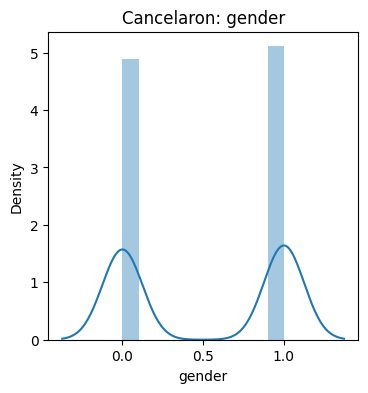

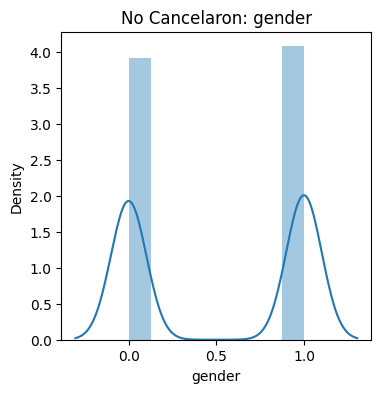

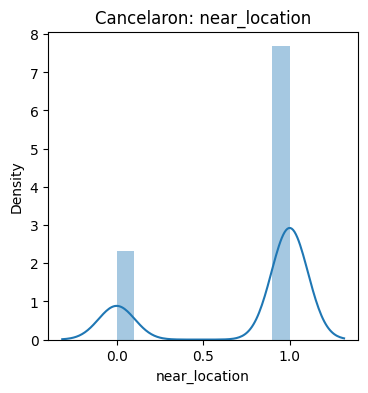

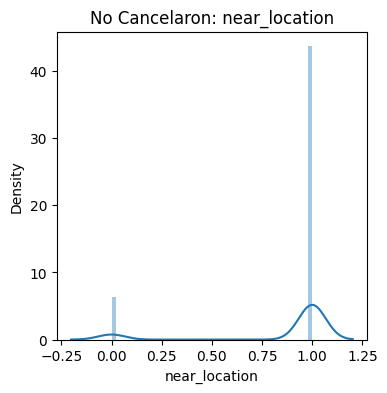

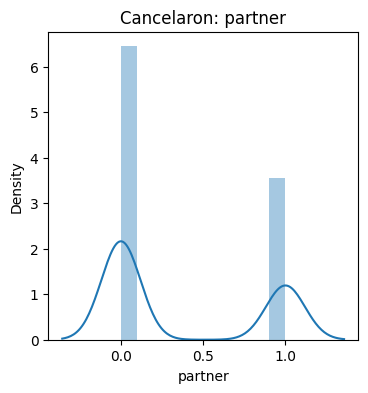

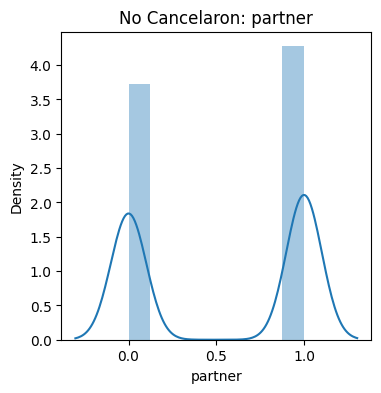

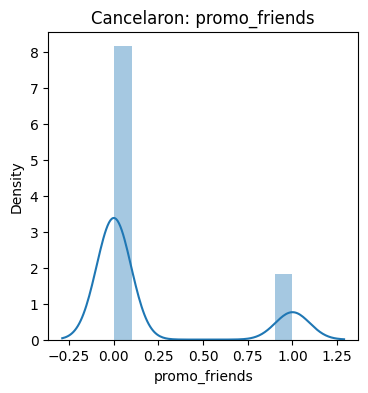

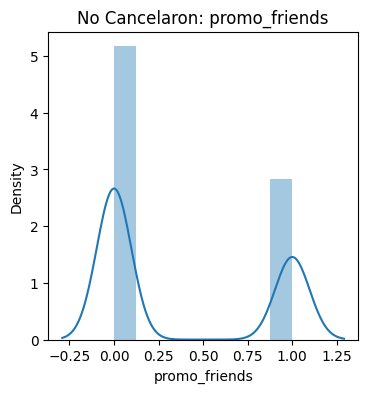

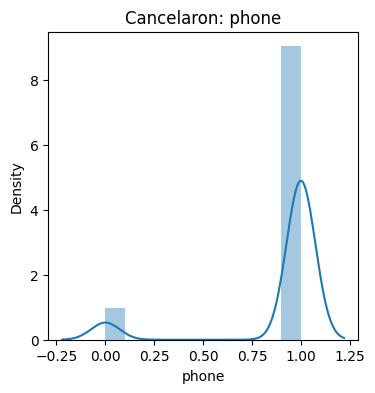

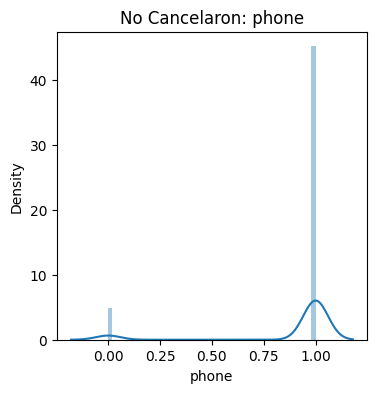

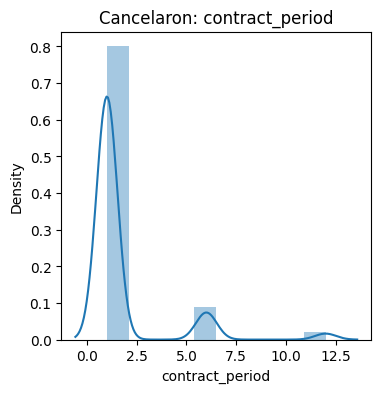

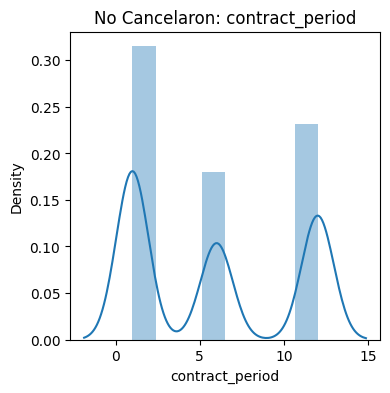

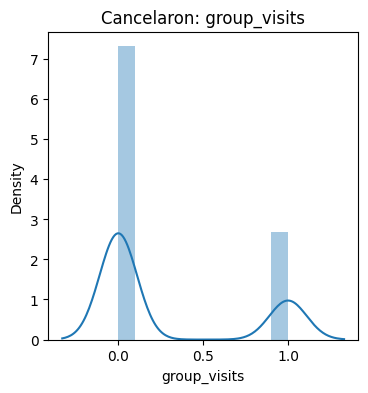

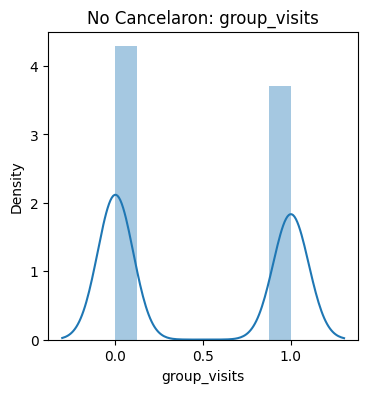

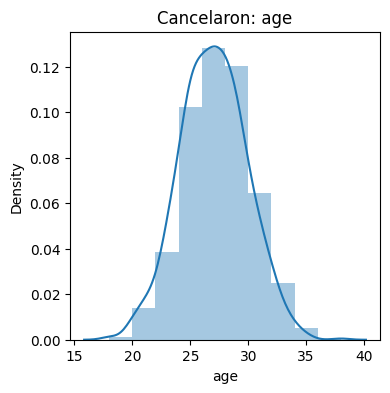

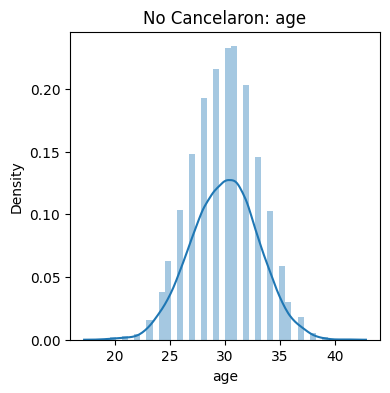

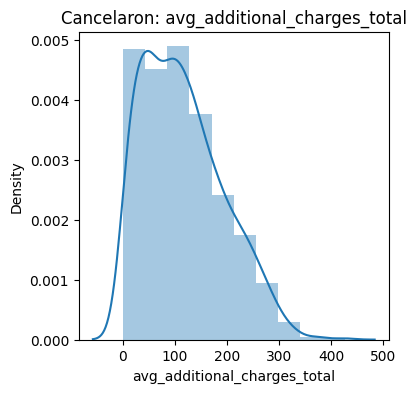

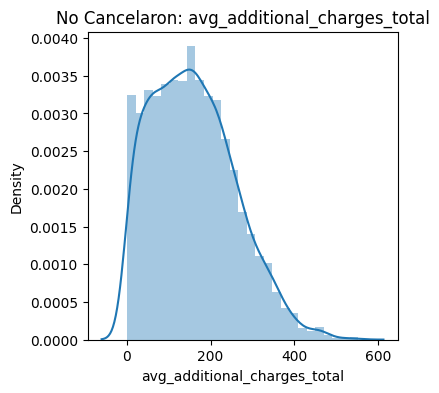

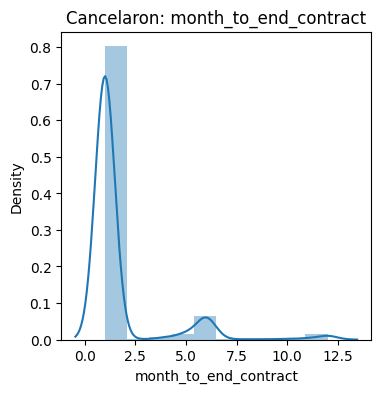

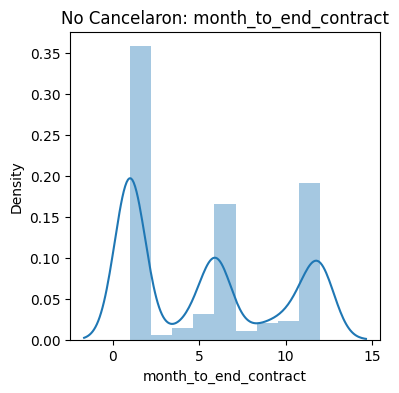

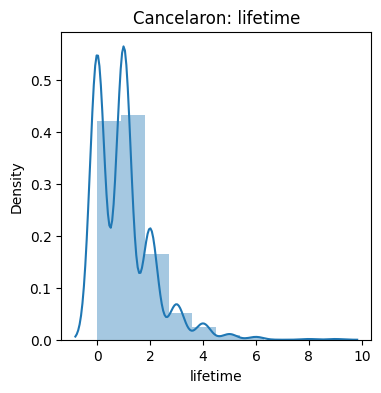

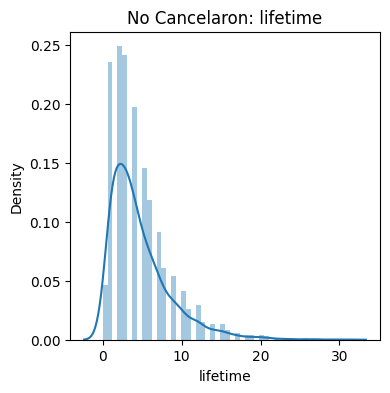

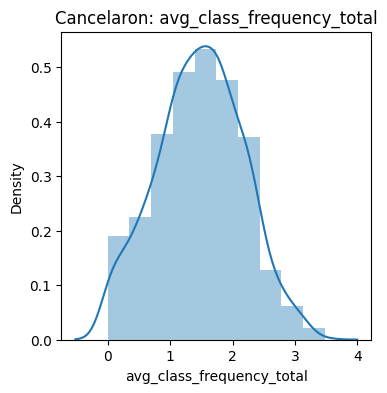

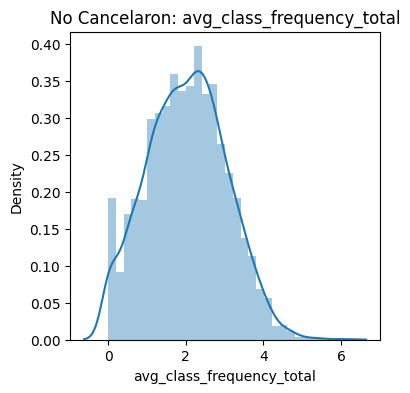

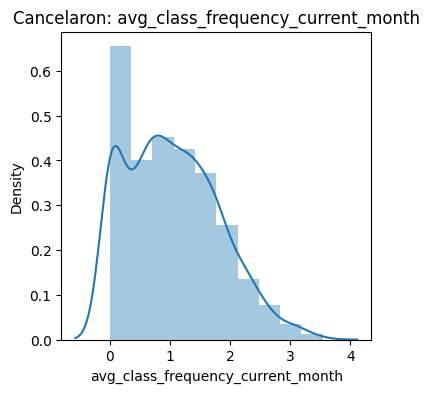

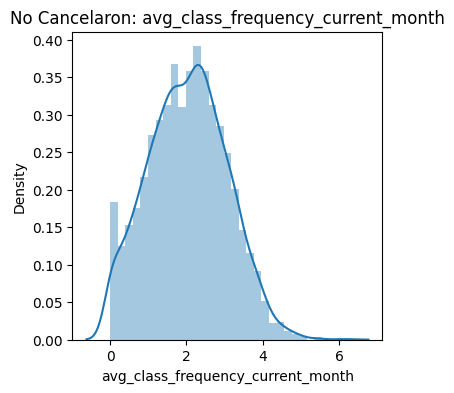

In [5]:
# Distribución de las características para los grupos

canceled = gym[gym['churn']==1].drop('churn', axis=1)
remained = gym[gym['churn']==0].drop('churn', axis=1)
for feature in canceled.columns:
    plt.figure(figsize=(4,4))
    #sns.barplot(data=gym, x=gym['churn'], y=gym[feature])
    sns.distplot(canceled[feature], bins = 10)
    plt.title(f'Cancelaron: {feature}')
    plt.show()

    plt.figure(figsize=(4,4))
    sns.distplot(remained[feature])
    plt.title(f'No Cancelaron: {feature}')
    plt.show()

In [6]:
# Matriz de correlación

cm = gym.corr()
display(cm)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


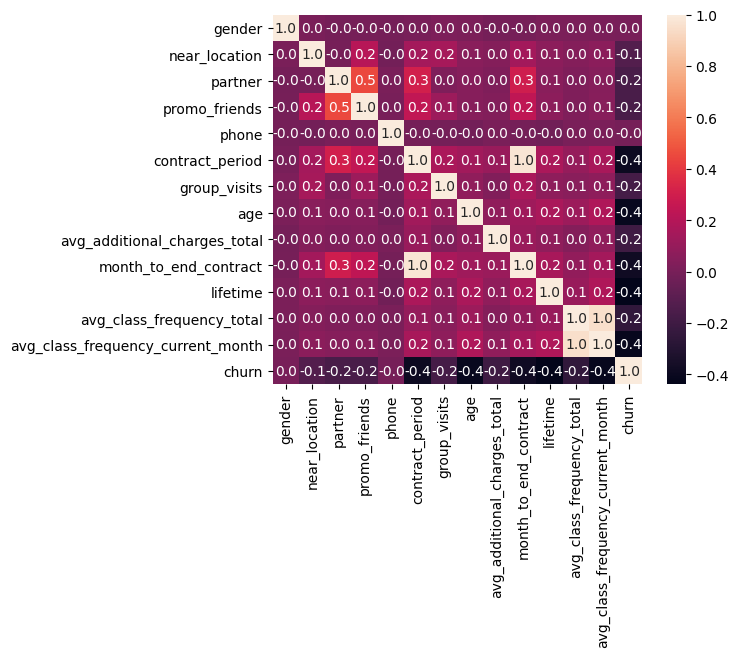

In [7]:
# Mapa de calor de la matriz de correlación

sns.heatmap(cm, square=True, annot=True, fmt='.1f')
plt.show()

**CONCLUSIONES**

En el análisis realizado no se han encontrado valores nulos o duplicados. Al mostrar la distribución de las características para los grupos de clientes que abandonaron y los que no han abandonado, se observa que las difrencias en las cantidades tienen un mayor número de valores en usuarios que no han cancelado, por lo que se puede pensar que tiene más usuarios activos actualmente.

Al observar la matriz de correlación se pueden apreciar características que están fuertemente relacionadas: `month_to_end_contract` y `contract_period`; `avg_class_frequency_total` y `avg_class_frequency_current_month`. Pero no parece haber características fuertemente relacionadas con la variable objetivo: `churn`.

[Volver al Inicio](#back)

## MODELOS DE CLASIFICACIÓN <a id='build_model'></a>
Después de haber analizado los datos con los que trabajaremos, ahora vamos a crear un modelo usando métodos de clasificación binaria para los clientes, donde la característica objetivo es la marcha del usuario el mes siguiente, es decir la columna `churn`.

Siguiendo el pipeline de Aprendizaje Automático, en la sección se realizarán los siguientes procedimientos:
1. Dividir los datos en conjuntos de entrenamiento y validación utilizando la función `train_test_split()`.
2. Entrenar el modelo con los métodos:
    * Regresión logística.
    * Bosque aleatorio.
3. Evaluar la exactitud, precisión y recall para ambos y compararlos.

### Entrenar el modelo <a id='train_models'></a>
En esta sección solamente vamos a crears y entrenar el modelo en el set de entrenamiento utilizandos dos métodos:
* Regresión logística.
* Bosque aleatorio.

Esto, con el fin de saber qué modelo es el más adecuado para dar los mejores resultados de predicción al problema de cancelación que queremos resolver.

In [8]:
# Dividir los datos en entrenamiento y validación

X = gym.drop(columns='churn')
y = gym['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
# Entrenar modelo usando Regresión Logística
lr_model = LogisticRegression(random_state=0) # solver='lbfgs', max_iter=100
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
# Entrenar modelo usando Bosque Aleatorio
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

**CONCLUSIONES**

Aquí primero hemos dividido los datos en un conjunto de entrenamiento y validación y separando la variable objetivo de los datos, utilicé una proporción 80/20 para la división y el parámetro 'random_state' para reducir la aleatoriedad de selección de los datos.

Después de esto simplemente se han creado y entrenado ambos modelos: Regresión Logística y Bosque Aleatorio. En el siguiente apartado serán evaluados para comprobar cuál de ellos es mejor para nuestro problema.

[Volver al Inicio](#back)

### Evaluar el modelo <a id='evaluate'></a>
En esta sección vamos a evaluar el modelo usando las siguientes métricas de evaluación: Exactitud, Precisión y Recall. Evaluremos ambos modelos con los datos de validación y se van a comparar para saber qué modelo da los mejores resultados para poder predecir la cancelación de los usuarios.

In [11]:
print('Métricas de Regresión Logística:')
print('Exactitud: {:.3f}'.format(accuracy_score(y_test, lr_predictions)))
print('Precisión: {:.3f}'.format(precision_score(y_test, lr_predictions)))
print('Recall: {:.3f}'.format(recall_score(y_test, lr_predictions)))

Métricas de Regresión Logística:
Exactitud: 0.922
Precisión: 0.866
Recall: 0.813


In [12]:
print('Métricas de Bosque Aleatorio:')
print('Exactitud: {:.3f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precisión: {:.3f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.3f}'.format(recall_score(y_test, rf_predictions)))

Métricas de Bosque Aleatorio:
Exactitud: 0.916
Precisión: 0.839
Recall: 0.818


**CONCLUSIONES**

Las métricas muestran que ambos modelos son buenos, sin embargo difieren ligeramente en la proporción de sus valores predichos. La Exactitud da la idea de que ambas producirían casi la misma proporción de predicciones exactas, esto si es que las clases están equilibradas, pero siendo mayor el valor para el algoritmo de Regresión Lineal.

En un modelo sin el equilibrio de clases, la Precisión indica que la proporción de respuestas correctas es mayor en el modelo de Regresión Logística. En cuanto al Recall, se observa que es ligeramente mayor en el modelo de Bosque Aleatorio, indicando que hay más probabilidad de que los valores predichos sean los reales.

Si tomamos en cuenta las diferencias que hay entre estos los valores, yo pienso que el modelo de Regresión Logística puede ser mejor, pues la diferencia entre las metricas de Exactitud y Precisión son mejores con respecto al otro modelo.

[Volver al Inicio](#back)

## CLÚSTERS DE USUARIOS <a id='user_clustering'></a>
Dejando de lado la columna de la variable obejtivo con los datos sobre la cancelación, en esta sección haremos uso del método de clústering para identificar los grupos de usuarios en los que se pueden dividir los datos, para poder darnos una idea de las razónes por las que algunos cancelan con mayor frecuencia. 

Usando una matriz de distancias y el algoritmo k-means, podremos observar los valores medios de los grupos y darnos una idea de qué factores habrá que tener en cuenta para predecir la cantidad de usuarios que pueden retirarse al próximo mes.

En esta sección se creará una matriz de distancias y se traza un dendrograma para estimar el número de grupos a usar. Posteriormente, usando el modelo de clustering con el algortimo K-means, se predicen los clústeres de clientes para observar  los valores medios de característica para cada clúster. Finalmente, con la tasa de cancelación para cada grupo se observará qué grupos son propensos a irse y cuáles no.

### Matriz de distancias <a id='matrix'></a>
Para observar la cantidad de clúster que se pueden generar con nuestros datos, se hará uso de una matriz de distancias, la cuál será observada a partir de un dendrograma, en la que se podrá hacer un conteo del número de grupos en los que se pueden dividir los datos.

Para realizar esta tarea, primero se deberán estandarizar los datos usando la función linkage(), que nos permite crear una matriz de distancias basada en la matriz de características estandarizada, finalmente se traza el dendrograma para observar esta matriz y estimar el número de clústeres que se pueden utilizar.

In [13]:
# Estandarizar los datos
scaler = StandardScaler()
x_sc = scaler.fit_transform(X)

# Crear la matriz de distancias
linked = linkage(x_sc, method = 'ward')

In [ ]:
# Trazar el dendrograma
#plt.figure(figsize=(5, 5))
dendrogram(linked, orientation='top')
plt.title('Dendrograma de los datos')
plt.show()

**CONCLUSIONES**

Realizando un análisis breve sobre los clústers de los datos pudimos encontrar la mejor cantidad de agrupaciones que se pueden generar en los datos. Después de haber estandarizado todos los datos y creado la matriz de distancias con ellos, mediante el dendrograma mostrado se puede estimar que el número óptimo de clústers es: 5 clústeres, gracias a los colores mostrados en el gráfico.

[Volver al Inicio](#back)

### Entrenar modelo de clustering <a id='train_clustering_model'></a>
En esta breve seccción solamente vamos a crear y entrenar el modelo de clustering con el algortimo K-means y predecir los clústeres de clientes. Usando el número de clústeres n=5 basándonos en el gráfico del paso anterior.


In [ ]:
# Crear el algoritmo K-Means
km = KMeans(n_clusters = 5, random_state=0)
# Entrenar y formar un vector de clústers
labels = km.fit_predict(x_sc)

[Volver al Inicio](#back)

### Características de los clústers <a id='clusters_characteristics'></a>
Ahora que se ha creado el modelo K-Means, se agrega el vector de clústeres al conjunto de datos, lo que no spermitirá agrupar todos los datos por clúster. Ahoremos el análisis de los valores medios de característica para cada clúster y se trazan sus distribuciones de características.


In [ ]:
# Agregar el número de clúster al conjunto de datos
gym['cluster'] = labels
# Valores medios de las características por clúster
mean_val = gym.groupby('cluster').mean()
display(mean_val)

In [ ]:
for feature in mean_val.columns:
    plt.figure(figsize=(4,4))
    #sns.barplot(data=mean_val, x=mean_val.index, y=mean_val[feature])
    sns.distplot(mean_val[feature], bins=10)
    #plt.title(f'{feature}')
    plt.show()


**CONCLUSIONES**

Al observar los valores medios por clúster, en las características con valores binarios(1/0) se observa que en algunos clústers el valor medio es alguno de los límites 0 o 1, mientras que en otros el valor es un número medio. Dichas características pueden no indicarnos mucho con respecto a la predicción de cancelación de los usuarios, pero muestran que esos grupos tienen seleccionados a miembros que tienen los mismos valores en esas características.

Se aprecia que el clúster 3 tiene los promedios más bajos en la mayoría de características que se asocian con las visitas, compras y periodos de contrato de las membresías. Puede que en este grupo los usuarios son más propensos a estar activos por menor tiempo.

[Volver al Inicio](#back)

### Cancelación <a id='cancel_rate'></a>
Para obtener nuestras conclusiones calculamos la tasa de cancelación para cada clúster, utilizando el método groupby(). De esta manera podremos observar si los grupos difieren en términos de la tasa de cancelación y qué grupos son propensos a cancelar y cuáles son más leales.

In [ ]:
# Tasa de cancelación por clúster
cancel_rt = gym.groupby('cluster').agg({'churn':'sum', 'lifetime':'sum'})
cancel_rt.rename(columns={'lifetime':'total'}, inplace=True)
cancel_rt['cancel_rate'] = cancel_rt['churn'] / cancel_rt['total'] * 100
display(cancel_rt.sort_values(by='cancel_rate', ascending=False))

**CONCLUSIONES**

Aquí se puede apreciar que los clústers tienen una tasa de cancelación distinta entre sí. El clúster con mayor tasa de cancelación es el clúster 3, indicando que los miembros que se agruparon en este clúster son más propensos a cancelar sus membresias; mientras que el clúster que tiene la menor tasa de cancelación es el clúster 0, mostrando que los miembros agrupados en el clúster son menos propensos a cancelar sus membresias.

Dado el análisis que pudimos hacer en el paso anterior, puedo concluir que los miembros que cancelan con mayor frecuencia son aquellos que ingresan con contratos de menor duración, suelen atender con menos regularidad al lugar y llevan menos tiempo inscritos.

[Volver al Inicio](#back)

## CONCLUSIONES <a id='conclusions'></a>
Al realizar el análisis de los datos, se pudo ver que ningúna de las características seleccionadas tenía relación con la variable objetivo propuesta, sin embargo algunas de estas características contaban con fuertes relaciones entre ellas. Con respecto a los modelos de clasificación para predecir la cancelación, usando las métricas de Exactitud: 0.922 y Precisión: 0.866, se pudo identificar que el mejor modelo para predecir los valores es el modelo de Regresión Logística.

El grupo que presentó mayor tasa de cancelación, mostró una media menor en las siguientes características: periodo del contrato, sesiones grupales, edad, cargos en servicios adicionales, tiempo de vida y las frecuencias de visita. Por lo que podemos decir que si un usuario es poco constante con alguna de las características de visitas o compras, es probable que tenga una cancelación más inmediata con respecto al resto.

Para evitar la cancelación rápida de los clientes, puedo proponer brindar beneficios por asistencias a los distintos tipos de sesiones (grupales o no), brindar breves promociones por contratos extendidos, inclusive dar descuentos en servicios extras de acuerdo a las asistencias mensuales que adquieran.

[Volver al Inicio](#back)